In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'1806173.csv') #-------------------------------------------Loading the dataset

In [3]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2019-05-28 00:00:00,2019.0,1.929279e+09,2019-05-09,20190508,20190509,20190524.0,USD,RV,1.0,NaN,29310.56,20190509.0,NAH4,1.929279e+09,0
1,U001,CCCA02,KRAFT us,2019-09-27 00:00:00,2019.0,1.929806e+09,2019-08-29,20190828,20190829,20191003.0,USD,RV,1.0,NaN,31812.99,20190829.0,NAG2,1.929806e+09,0
2,U001,0200769623,WAL-MAR foundation,2020-03-03 00:00:00,2020.0,1.930550e+09,2020-02-21,20200221,20200221,20200307.0,USD,RV,1.0,NaN,5709.11,20200221.0,NAH4,1.930550e+09,0
3,U001,0200769623,WAL-MAR foundation,2020-02-21 00:00:00,2020.0,1.930504e+09,2020-02-10,20200208,20200210,20200225.0,USD,RV,1.0,NaN,50688.27,20200210.0,NAH4,1.930504e+09,0
4,U001,0200257211,SUI systems,2019-05-13 00:00:00,2019.0,1.929209e+09,2019-04-25,20190425,20190425,20190515.0,USD,RV,1.0,NaN,3230.79,20190425.0,NAD1,1.929209e+09,0


In [4]:
#filters the data where clear_date is null and storing it in another dataframe
test_data=df[df.clear_date.isnull()].reset_index(drop=True)
test_data.shape

(3402, 19)

In [5]:
#filters the data which has a date in clear_date column. This will be the training dataset
actual_dataset=df[df.clear_date.notnull()].reset_index(drop=True)
actual_dataset.shape

(46598, 19)

# PREPROCESSING 

In [6]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2019-05-28 00:00:00,2019.0,1.929279e+09,2019-05-09,20190508,20190509,20190524.0,USD,RV,1.0,NaN,29310.56,20190509.0,NAH4,1.929279e+09,0
1,U001,CCCA02,KRAFT us,2019-09-27 00:00:00,2019.0,1.929806e+09,2019-08-29,20190828,20190829,20191003.0,USD,RV,1.0,NaN,31812.99,20190829.0,NAG2,1.929806e+09,0
2,U001,0200769623,WAL-MAR foundation,2020-03-03 00:00:00,2020.0,1.930550e+09,2020-02-21,20200221,20200221,20200307.0,USD,RV,1.0,NaN,5709.11,20200221.0,NAH4,1.930550e+09,0
3,U001,0200769623,WAL-MAR foundation,2020-02-21 00:00:00,2020.0,1.930504e+09,2020-02-10,20200208,20200210,20200225.0,USD,RV,1.0,NaN,50688.27,20200210.0,NAH4,1.930504e+09,0
4,U001,0200257211,SUI systems,2019-05-13 00:00:00,2019.0,1.929209e+09,2019-04-25,20190425,20190425,20190515.0,USD,RV,1.0,NaN,3230.79,20190425.0,NAD1,1.929209e+09,0


In [7]:
actual_dataset.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [8]:
#preparing target variable here i.e DELAY
actual_dataset['clear_date'] = pd.to_datetime(actual_dataset['clear_date'])
actual_dataset['due_in_date'] = pd.to_datetime(actual_dataset['due_in_date'], format='%Y%m%d')
actual_dataset['delay']=(actual_dataset['clear_date'] - actual_dataset['due_in_date']).dt.days
actual_dataset.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
46593,CA02,0140104392,FLANAG associates,2019-10-07,2019.0,2.960581e+09,2019-09-21,20190921,20190921,2019-10-03,CAD,RV,1.0,NaN,20111.80,20190923.0,CA10,2.960581e+09,0,4
46594,CA02,0140106181,THE,2019-07-03,2019.0,2.960543e+09,2019-04-22,20190422,20190422,2019-05-04,CAD,RV,1.0,NaN,21673.88,20190424.0,CA10,2.960543e+09,0,60
46595,CA02,0140104429,COSTCO co,2019-11-08,2019.0,2.960588e+09,2019-10-26,20191026,20191026,2019-11-09,CAD,RV,1.0,NaN,74012.56,20191030.0,CA10,2.960588e+09,0,-1
46596,U001,0200726979,BJ'S foundation,2019-04-02,2019.0,1.928991e+09,2019-03-17,20190319,20190317,2019-04-01,USD,RV,1.0,NaN,176.10,20190317.0,NAA8,1.928991e+09,0,1
46597,U001,0200769623,WAL-MAR associates,2019-02-22,2019.0,1.928726e+09,2019-02-06,20190203,20190206,2019-02-21,USD,RV,1.0,NaN,35189.49,20190206.0,NAH4,1.928726e+09,0,1


In [9]:
actual_dataset.isnull().sum() #---------------------------checking number of null values in each column

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             46598
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
delay                         0
dtype: int64

In [10]:
#all the data in area_business column is null, so we will drop this column
actual_dataset.drop(['area_business'], axis = 1,inplace=True)

In [11]:
print(actual_dataset.shape)
actual_dataset.isnull().sum() #--------------checking for more null values

(46598, 19)


business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                1
isOpen                    0
delay                     0
dtype: int64

In [12]:
#null inferring invoice_id column with doc_id column because the values are all same
actual_dataset["invoice_id"] = actual_dataset["invoice_id"].fillna(actual_dataset["doc_id"])

In [13]:
print(actual_dataset.shape)
actual_dataset.isnull().sum() #--------------checking for more null values

(46598, 19)


business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
delay                     0
dtype: int64

In [14]:
#converting normalised document_create_date to datetime variable
actual_dataset['document_create_date.1'] = pd.to_datetime(actual_dataset['document_create_date.1'], format='%Y%m%d')

#converting posting_date to datetime variable
actual_dataset['posting_date'] = pd.to_datetime(actual_dataset['posting_date'])

#converting document_create_date to datetime variable
actual_dataset['document_create_date'] = pd.to_datetime(actual_dataset['document_create_date'], format='%Y%m%d')

#converting baseline_create_date to datetime variable
actual_dataset['baseline_create_date'] = pd.to_datetime(actual_dataset['baseline_create_date'], format='%Y%m%d')

In [15]:
actual_dataset.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
46593,CA02,0140104392,FLANAG associates,2019-10-07,2019.0,2.960581e+09,2019-09-21,2019-09-21,2019-09-21,2019-10-03,CAD,RV,1.0,20111.80,2019-09-23,CA10,2.960581e+09,0,4
46594,CA02,0140106181,THE,2019-07-03,2019.0,2.960543e+09,2019-04-22,2019-04-22,2019-04-22,2019-05-04,CAD,RV,1.0,21673.88,2019-04-24,CA10,2.960543e+09,0,60
46595,CA02,0140104429,COSTCO co,2019-11-08,2019.0,2.960588e+09,2019-10-26,2019-10-26,2019-10-26,2019-11-09,CAD,RV,1.0,74012.56,2019-10-30,CA10,2.960588e+09,0,-1
46596,U001,0200726979,BJ'S foundation,2019-04-02,2019.0,1.928991e+09,2019-03-17,2019-03-19,2019-03-17,2019-04-01,USD,RV,1.0,176.10,2019-03-17,NAA8,1.928991e+09,0,1
46597,U001,0200769623,WAL-MAR associates,2019-02-22,2019.0,1.928726e+09,2019-02-06,2019-02-03,2019-02-06,2019-02-21,USD,RV,1.0,35189.49,2019-02-06,NAH4,1.928726e+09,0,1


In [16]:
actual_dataset.nunique(axis=0)#------------------------------------check for constant values

business_code                 6
cust_number                1400
name_customer              4154
clear_date                  405
buisness_year                 2
doc_id                    46598
posting_date                424
document_create_date        430
document_create_date.1      424
due_in_date                 493
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         42074
baseline_create_date        434
cust_payment_terms           69
invoice_id                46598
isOpen                        1
delay                       181
dtype: int64

**We see business_year, invoice_currency and document_type to be quasi-constant columns
But we will handle these later according to our usage
Since posting_id and isOpen have same values all over the dataset, i.e., constant values respectively. **

In [17]:
#So removing those two columns

actual_dataset.drop(['posting_id','isOpen'],inplace=True,axis=1)
actual_dataset.shape

(46598, 17)

In [18]:
actual_dataset.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
delay                              int64
dtype: object

In [19]:
#checking for 1970 error in the datetime columns

actual_dataset.head(10)

#no errors found

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200769623,WAL-MAR systems,2019-05-28,2019.0,1.929279e+09,2019-05-09,2019-05-08,2019-05-09,2019-05-24,USD,RV,29310.56,2019-05-09,NAH4,1.929279e+09,4
1,U001,CCCA02,KRAFT us,2019-09-27,2019.0,1.929806e+09,2019-08-29,2019-08-28,2019-08-29,2019-10-03,USD,RV,31812.99,2019-08-29,NAG2,1.929806e+09,-6
2,U001,0200769623,WAL-MAR foundation,2020-03-03,2020.0,1.930550e+09,2020-02-21,2020-02-21,2020-02-21,2020-03-07,USD,RV,5709.11,2020-02-21,NAH4,1.930550e+09,-4
3,U001,0200769623,WAL-MAR foundation,2020-02-21,2020.0,1.930504e+09,2020-02-10,2020-02-08,2020-02-10,2020-02-25,USD,RV,50688.27,2020-02-10,NAH4,1.930504e+09,-4
4,U001,0200257211,SUI systems,2019-05-13,2019.0,1.929209e+09,2019-04-25,2019-04-25,2019-04-25,2019-05-15,USD,RV,3230.79,2019-04-25,NAD1,1.929209e+09,-2
5,U001,0200148860,DOLLA foundation,2019-05-24,2019.0,1.929293e+09,2019-05-10,2019-05-10,2019-05-10,2019-05-25,USD,RV,3677.94,2019-05-10,NAA8,1.929293e+09,-1
6,U001,0200769623,WAL-MAR systems,2019-10-25,2019.0,1.930009e+09,2019-10-15,2019-10-13,2019-10-15,2019-10-30,USD,RV,73697.56,2019-10-15,NAH4,1.930009e+09,-5
7,U001,0200726979,BJ'S foundation,2020-02-18,2020.0,1.930469e+09,2020-02-02,2020-02-01,2020-02-02,2020-02-17,USD,RV,99.06,2020-02-02,NAA8,1.930469e+09,1
8,U001,0200769623,WAL-MAR associates,2019-05-10,2019.0,1.929200e+09,2019-04-24,2019-04-24,2019-04-24,2019-05-09,USD,RV,54087.85,2019-04-24,NAH4,1.929200e+09,1
9,CA02,140104440,SO llc,2019-04-10,2019.0,2.960538e+09,2019-03-27,2019-03-27,2019-03-27,2019-04-06,CAD,RV,85546.25,2019-03-27,CA10,2.960538e+09,4


In [20]:
#Now we will check for duplicate rows in the dataset

actual_dataset.duplicated().sum()


0

In [21]:
#checking the unique values in business_code
actual_dataset['business_code'].unique()

array(['U001', 'CA02', 'U002', 'U013', 'U005', 'U007'], dtype=object)

In [22]:
#Now we will check for duplicated columns in the dataset

def findDuplicateColumns(actual_dataset):
    duplicateColumnNames=set()
    for x in range(actual_dataset.shape[1]):
        col1=actual_dataset.iloc[:,x]
        for y in range(x+1,actual_dataset.shape[1]):
            col2=actual_dataset.iloc[:,y]
            if (col1.equals(col2)):
                duplicateColumnNames.add(actual_dataset.columns.values[y])
    return list(duplicateColumnNames)

duplicated_columns=findDuplicateColumns(actual_dataset)
print(duplicated_columns)

['invoice_id']


**We will DROP this invoice_id column**

In [23]:
actual_dataset.drop(['invoice_id'],inplace=True,axis=1)

In [24]:
#checking for anomalies in date columns that we will be using later
actual_dataset[(actual_dataset['document_create_date.1']>actual_dataset['due_in_date'])].shape

(148, 16)

In [25]:
anomaly_dataset=actual_dataset[(actual_dataset['document_create_date.1']>actual_dataset['due_in_date'])]
anomaly_dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay
1390,U001,0200592182,DECA systems,2019-05-14,2019.0,1.929315e+09,2019-05-14,2019-05-14,2019-05-14,2019-05-11,USD,RV,2228.08,2019-05-01,NAM2,3
2507,U001,0200230690,DECA llc,2020-02-26,2020.0,1.930457e+09,2020-01-30,2020-01-30,2020-01-30,2020-01-26,USD,RV,2462.60,2020-01-16,NAM2,31
2582,U001,0200803720,DEC corp,2019-01-28,2019.0,1.928689e+09,2019-01-26,2019-01-26,2019-01-26,2019-01-23,USD,RV,20154.72,2019-01-16,NAM1,5
2980,U001,0200803720,DEC in,2019-05-25,2019.0,1.929379e+09,2019-05-25,2019-05-25,2019-05-25,2019-05-23,USD,RV,21092.41,2019-05-16,NAM1,2
3013,U001,0200353024,DECA trust,2019-02-27,2019.0,1.928858e+09,2019-02-26,2019-02-26,2019-02-26,2019-02-23,USD,RV,8556.30,2019-02-16,NAM1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46035,U001,0200230690,DECA systems,2019-01-28,2019.0,1.928697e+09,2019-01-28,2019-01-28,2019-01-28,2019-01-23,USD,RV,6984.25,2019-01-16,NAM1,5
46135,U001,0200803720,DEC corp,2020-01-27,2020.0,1.930433e+09,2020-01-24,2020-01-24,2020-01-24,2020-01-23,USD,RV,15823.60,2020-01-16,NAM1,4
46148,U001,0200592182,DECA corp,2019-07-13,2019.0,1.929618e+09,2019-07-13,2019-07-13,2019-07-13,2019-07-08,USD,RV,5500.36,2019-07-01,NAM1,5
46182,U001,0200754118,ARMY co,2019-06-07,2019.0,1.929368e+09,2019-05-23,2019-05-23,2019-05-23,2019-05-16,USD,RV,67.32,2019-05-01,NAM3,22


**We see 148 rows which have anomalies. This is a very small number as compared to our data size, so we can drop these rows.**

In [26]:
#Removing those 148 rows

anomaly_list=list(anomaly_dataset.index)
anomaly_list
actual_dataset.drop(anomaly_list,inplace=True)
actual_dataset.shape

(46450, 16)

# TRAIN-VAL-TEST SPLIT

In [27]:
#first sorting the dataset on the basis of document_create_date.1 column
#because split will be done on this basis only

actual_dataset.sort_values('document_create_date.1',inplace=True)
actual_dataset.tail(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay
35039,U001,0200769623,WAL-MAR llc,2020-03-09,2020.0,1.930565e+09,2020-02-26,2020-02-24,2020-02-26,2020-03-12,USD,RV,46353.06,2020-02-26,NAH4,-3
8418,U001,0200769623,WAL-MAR,2020-03-09,2020.0,1.930570e+09,2020-02-26,2020-02-25,2020-02-26,2020-03-12,USD,RV,7371.22,2020-02-26,NAH4,-3
41160,U001,0200771157,WEIS trust,2020-03-12,2020.0,1.930571e+09,2020-02-26,2020-02-26,2020-02-26,2020-03-12,USD,RV,68462.15,2020-02-26,NAA8,0
26755,U001,0200777735,NASH co,2020-03-11,2020.0,1.930581e+09,2020-02-27,2020-02-28,2020-02-27,2020-03-13,USD,RV,115025.44,2020-02-27,NAA8,-2
26938,CA02,0140106408,WAL-M systems,2020-03-18,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-09,CAD,RV,16811.94,2020-02-28,CA10,9
37126,CA02,0140105686,SYSC systems,2020-03-12,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-10,CAD,RV,5478.80,2020-02-29,CA10,2
34509,U001,CCU013,KRAFT F corp,2020-03-27,2020.0,1.930572e+09,2020-02-27,2020-02-27,2020-02-27,2020-02-27,USD,RV,9955.20,2020-02-27,NAX2,29
16152,U001,0200759878,SA systems,2020-03-13,2020.0,1.930570e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,64190.53,2020-02-27,NAH4,0
44353,U001,0200794332,COST systems,2020-03-12,2020.0,1.930576e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,4063.66,2020-02-27,NAAX,-1
33127,U001,0200413833,LDC corp,2020-03-20,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-02-27,2020-03-13,USD,RV,28311.65,2020-02-27,NAA8,7


***Starting the train-val-test split of the actual_datset***

In [28]:
#separating dataset into train and temp
#temp will be then seperated into test set and validation set
#Here I will be doing a 70-15-15 split
#Train-70      Validation-15       Test-15
from sklearn.model_selection import train_test_split
dataset_new=actual_dataset.copy()

#splitting dataset into train and temp first

x_train, x_temp, y_train, y_temp = train_test_split(dataset_new.drop('delay', axis=1), 
                                                    dataset_new.delay, 
                                                    test_size=0.3,
                                                    random_state=0,shuffle=False)
print(x_train.shape, y_train.shape, x_temp.shape, y_temp.shape)

(32515, 15) (32515,) (13935, 15) (13935,)


In [29]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
33344,U001,0200936373,SUPE trust,2019-01-14,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,93305.55,2018-12-30,NAA8
36835,U001,0200769623,WAL-MAR associates,2019-01-16,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,344.91,2018-12-30,NAH4
40060,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,69630.53,2018-12-30,NAH4
16963,CA02,0140104409,LOB associates,2019-01-11,2019.0,2.960521e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,CAD,RV,255978.52,2018-12-31,CA10
15107,U001,0200772670,ASSOCIAT in,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,110562.85,2018-12-30,NAU5


**splitting the temp dataset to validation and test dataset**

In [30]:

x_val, x_test, y_val, y_test= train_test_split(x_temp, y_temp, test_size=0.5, 
                                               random_state=0, shuffle=False)
print(x_val.shape, x_test.shape, y_val.shape, y_test.shape)

(6967, 15) (6968, 15) (6967,) (6968,)


In [31]:
y_val

13574    28
4912      2
14861     0
15436     0
2598      2
         ..
31413     1
41500    -1
40406    -8
30140     1
22886    -2
Name: delay, Length: 6967, dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

***Now we will do some EDA on the training dataset***

In [32]:
import seaborn as sb  #-----------------------------importing some libraries that we might need later
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn import preprocessing

In [33]:
x_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

**Getting all numerical columns in a seperate list**

In [34]:
numerical_columns=list(x_train.columns[x_train.dtypes=='float64'])
numerical_columns

['buisness_year', 'doc_id', 'total_open_amount']

We see that all of our numerical columns except "total_open_amount" are not having values which can be later used for any prediction

**Getting all datetime type columns in a seperate list**

In [35]:
datetime_columns=list(x_train.columns[x_train.dtypes=='datetime64[ns]'])
datetime_columns

['clear_date',
 'posting_date',
 'document_create_date',
 'document_create_date.1',
 'due_in_date',
 'baseline_create_date']

**Getting all object type columns in a seperate list**

In [36]:
object_columns=list(x_train.columns[x_train.dtypes=='object'])
object_columns

['business_code',
 'cust_number',
 'name_customer',
 'invoice_currency',
 'document type',
 'cust_payment_terms']

**Getting all statistical descriptions of the numerical columns**

In [37]:
x_train[numerical_columns].describe()

,buisness_year,doc_id,total_open_amount
count,32515.0,3.251500e+04,32515.000000
mean,2019.0,2.013337e+09,31874.685491
std,0.0,2.829685e+08,39942.131975
min,2019.0,1.928502e+09,3.580000
25%,2019.0,1.928997e+09,4475.145000
50%,2019.0,1.929426e+09,16969.500000
75%,2019.0,1.929772e+09,46509.540000
max,2019.0,9.500000e+09,813905.360000


**Inference:
There is one numerical column whose Standard deviation is 0 and that is business_year.
We already saw previously that business_year was Quasi-constant column and is also categorical.
So ignoring this column won't affect our prediction.
And business_year is a column from which we can't deduce anything about the clear_date or delay in payment **

In [38]:
#checking number of unique values in categorical columns
x_train[object_columns].nunique()


business_code            6
cust_number           1290
name_customer         3571
invoice_currency         2
document type            2
cust_payment_terms      61
dtype: int64

***Let's see the unique values in each categorical column***

In [39]:
for col in object_columns:
    print(col)
    print(x_train[col].unique(),'\n')

business_code
['U001' 'CA02' 'U013' 'U002' 'U005' 'U007'] 

cust_number
['0200936373' '0200769623' '0140104409' ... '0100048904' '0200748335'
 '0200286074'] 

name_customer
['SUPE trust' 'WAL-MAR associates' 'WAL-MAR foundation' ... 'LAND llc'
 'NICH us' 'SKID '] 

invoice_currency
['USD' 'CAD'] 

document type
['RV' 'X2'] 

cust_payment_terms
['NAA8' 'NAH4' 'CA10' 'NAU5' 'NAX2' 'NAVF' 'NAAX' 'NAC6' 'NAD1' 'NAVE'
 'NAAW' 'NA32' 'NA3B' 'NA3F' 'NAUP' 'CA30' 'C106' 'NAM4' 'NAD5' 'NA10'
 'NA9X' 'NAG2' 'NAM1' 'NAM2' 'NAVQ' 'NAUZ' 'NAWP' 'NAB1' 'NAVM' 'NAVL'
 'NAWM' 'NABG' 'NACB' 'NAD4' 'BR56' 'NA38' 'NA84' 'NAGD' 'NAVD' 'NAV2'
 'NANC' 'NA31' 'CAX2' 'NATH' 'CAB1' 'NAUY' 'NAV9' 'NA25' 'NA8Q' 'CA60'
 'NAUI' 'NATJ' 'B052' 'NAVR' 'NAVC' 'NAWN' 'NATM' 'NAUW' 'NAWU' 'NATV'
 'BR12'] 



**INFERENCES:
1.We can create a new column from cust_payment_terms which will store only the first character of the values as we can see that those are repeated in the data(EX: N,C,B)**

**2.There is no constant categorical column as there is no singular unique value in any of the unique list.**

**3.We need to encode the other categorical columns too if we intend to use them later on.**

In [40]:
#grouping doc_id by business_code 

x_train.groupby('business_code')['doc_id'].count()

business_code
CA02     2609
U001    29335
U002      118
U005        7
U007        1
U013      445
Name: doc_id, dtype: int64




### Now let's do some Univariate analysis and visualize our data and look for some patterns



**Let's see the skewness of some of the numerical columns say, the total_open_amount column**

Before transformation
2.960215098472577


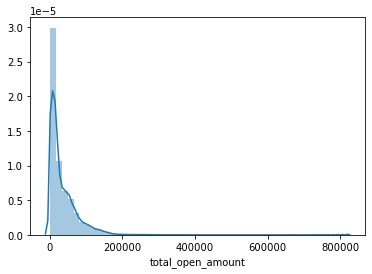

In [41]:
print("Before transformation")
print((x_train['total_open_amount']).skew())
sb.distplot(x_train.total_open_amount)

**We can see that this column is highly positively skewed.**
**We know that the acceptable skew value is [-0.5,0.5]. We might even consider [-1,1] **


After transform
0.25926961072819255


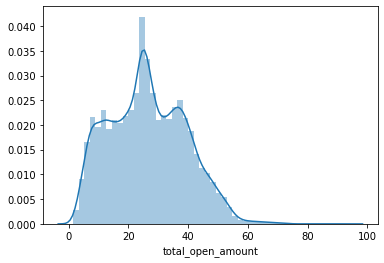

In [42]:
#Checking what tranformation function will be appropriate
print("\nAfter transform")
print((np.cbrt(x_train['total_open_amount'])).skew())
sb.distplot(np.cbrt(x_train.total_open_amount))

**A feature of cube root transformed 'total_open_amount' can be created to minimize the skew value.**

In [43]:
x_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

**I will do some plot_date analysis on document_create_date.1 and due_in_date**

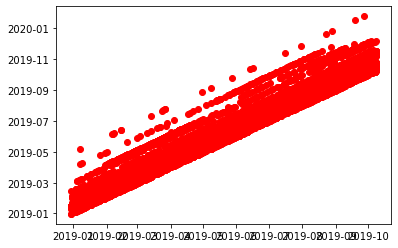

In [44]:
plt.plot_date(x_train['document_create_date.1'], x_train['due_in_date'], c = 'red')

**We can see that relation between these two columns are quite linear and uniform**


**I will do some plot_date analysis on document_create_date and clear_date**


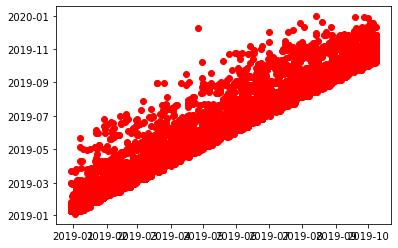

In [45]:
plt.plot_date(x_train['document_create_date.1'], x_train['clear_date'], c = 'red')

**This plotting is also quite linear but not as uniform as the plotting between document_create_date.1 and due_in_date columns**

### Now I will do some Multivariate analysis

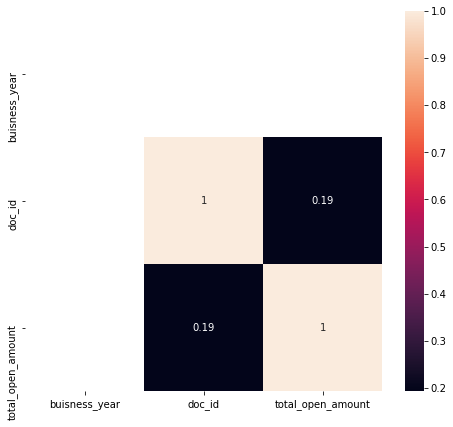

In [46]:
correlation=x_train.corr()
plt.subplots(figsize=(8,7))
sb.heatmap(correlation,annot=True)


**Now let's do some analysis on target column and other columns**


In [47]:
#checking the correlation between the target column and the months in due in date column

correlation=y_train.corr(x_train['due_in_date'].dt.month)
correlation

-0.035246482453845714

**We see that the months in due_in_date and the target columns are inversely correlated. We can engineer a feature say 'months_due_in_date' for our later assumptions**

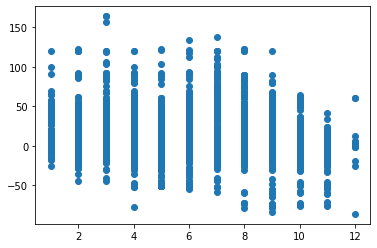

In [48]:
#scatter plot between months in due_in_date and delay column

plt.scatter(x_train['due_in_date'].dt.month,y_train)
plt.show()

**Inference:**

**1.We can again see that these two columns are inversely related.**

**2. We can also see that around the 7th month i.e. July, the peak in delay days is max and around the 9th month i.e. September, the drop in delay days is max**

***We are deducing these inferences after ignoring the extreme outliers***

In [49]:
#checking the percent values in each category of business_code column

x_train['business_code'].value_counts()/len(x_train)*100

U001    90.219899
CA02     8.023989
U013     1.368599
U002     0.362909
U005     0.021529
U007     0.003076
Name: business_code, dtype: float64

**We can create a label encoded feature from business_code column giving the least priority to 'U001', since it contains 90.2% value. Giving it the lowest priority will not bias our model.**

<module 'seaborn' from 'C:\\Users\\KIIT\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

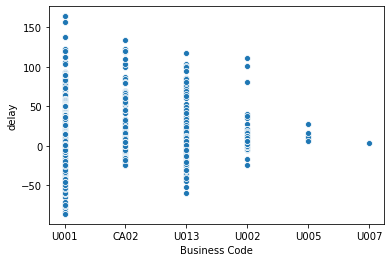

In [50]:
#checking the scatterplot between the business code column and the target column
new_dataframe=pd.DataFrame(list(zip(x_train['business_code'],y_train)),
                          columns=['Business Code','delay'])
sb.scatterplot(x=new_dataframe['Business Code'],y=new_dataframe['delay'],data=new_dataframe)
sb

**Inference:**

**1. We can clearly see that the business with business_code='U001' has the highest number of delay values and the business with business_code='U007' has the lowest number of delay values.**

**2. We can encode business_code column in two ways in FE since it is a categorical column.**

In [51]:
y_train.describe()

count    32515.000000
mean         1.061695
std         11.380711
min        -86.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        164.000000
Name: delay, dtype: float64

In [52]:
#checking the correlation between the target column and the months in document create date.1 column

correlation=y_train.corr(x_train['document_create_date.1'].dt.month)
correlation

-0.010885046203951773

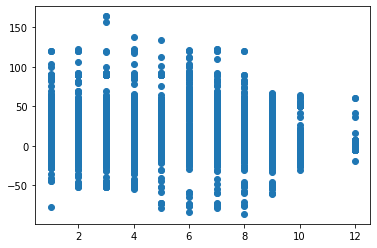

In [53]:
#scatter plot between months in document_create_date.1 and delay column

plt.scatter(x_train['document_create_date.1'].dt.month,y_train)
plt.show()

**Since months in document_create_date.1 column is not as correlated as due_in_date, we might not be moving forward with this column in Feature Engineering**

# FEATURE ENGINEERING (FE)

### First feature to be engineered will be done by encoding the 'business_code' column

**Target encoding the 'business_code' column**

In [54]:
means = new_dataframe.groupby('Business Code')['delay'].mean()
means

Business Code
CA02     6.232273
U001     0.449804
U002     8.101695
U005    12.857143
U007     4.000000
U013     9.024719
Name: delay, dtype: float64

In [55]:
#mapping the encoded business_code column to x_train and storing it in a new column named Encoded business_code

x_train['Encoded business_code'] = x_train['business_code'].map(means)

In [56]:
x_train.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,Encoded business_code
33344,U001,0200936373,SUPE trust,2019-01-14,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,93305.55,2018-12-30,NAA8,0.449804
36835,U001,0200769623,WAL-MAR associates,2019-01-16,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,344.91,2018-12-30,NAH4,0.449804
40060,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,69630.53,2018-12-30,NAH4,0.449804
16963,CA02,0140104409,LOB associates,2019-01-11,2019.0,2.960521e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,CAD,RV,255978.52,2018-12-31,CA10,6.232273
15107,U001,0200772670,ASSOCIAT in,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,110562.85,2018-12-30,NAU5,0.449804
28071,U001,0200769623,WAL-MAR associates,2019-01-10,2019.0,1.928542e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,49910.31,2018-12-30,NAH4,0.449804
37408,U001,CCU013,KRAFT F us,2019-03-01,2019.0,1.928517e+09,2018-12-30,2018-12-31,2018-12-30,2018-12-30,USD,RV,878.24,2018-12-30,NAX2,0.449804
11571,CA02,0140106249,FINDLAY corporation,2019-01-16,2019.0,2.960520e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-13,CAD,RV,2632.55,2019-01-03,CA10,6.232273
2616,U013,CC5050,H.J. HE corporation,2019-03-22,2019.0,1.991819e+09,2018-12-30,2018-12-26,2018-12-30,2019-02-13,USD,RV,866.92,2018-12-30,NAVF,9.024719
17137,U001,0200769623,WAL-MAR in,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,68730.85,2018-12-30,NAH4,0.449804


### Second feature to be engineered will be done by extracting the month of due_in_date

**Since due_in_date column is a datetime type column, so we can't train our model on this directly. We saw the relation between the months in due_in_date column and delay column, so we will decompose this column and use the month value as a feature and since the month values will be integer, we will be able to train our model on this.**

In [57]:
x_train['month of due_in_date']=x_train['due_in_date'].dt.month

In [58]:
x_train.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,Encoded business_code,month of due_in_date
33344,U001,0200936373,SUPE trust,2019-01-14,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,93305.55,2018-12-30,NAA8,0.449804,1
36835,U001,0200769623,WAL-MAR associates,2019-01-16,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,344.91,2018-12-30,NAH4,0.449804,1
40060,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,69630.53,2018-12-30,NAH4,0.449804,1
16963,CA02,0140104409,LOB associates,2019-01-11,2019.0,2.960521e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,CAD,RV,255978.52,2018-12-31,CA10,6.232273,1
15107,U001,0200772670,ASSOCIAT in,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,110562.85,2018-12-30,NAU5,0.449804,1
28071,U001,0200769623,WAL-MAR associates,2019-01-10,2019.0,1.928542e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,49910.31,2018-12-30,NAH4,0.449804,1
37408,U001,CCU013,KRAFT F us,2019-03-01,2019.0,1.928517e+09,2018-12-30,2018-12-31,2018-12-30,2018-12-30,USD,RV,878.24,2018-12-30,NAX2,0.449804,12
11571,CA02,0140106249,FINDLAY corporation,2019-01-16,2019.0,2.960520e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-13,CAD,RV,2632.55,2019-01-03,CA10,6.232273,1
2616,U013,CC5050,H.J. HE corporation,2019-03-22,2019.0,1.991819e+09,2018-12-30,2018-12-26,2018-12-30,2019-02-13,USD,RV,866.92,2018-12-30,NAVF,9.024719,2
17137,U001,0200769623,WAL-MAR in,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,68730.85,2018-12-30,NAH4,0.449804,1



### Third feature to be engineered will be done by creating a column from the cube root of total_open_amount column

**We saw the skewness of total_open_amount column and observed that it was a highly positive skew.**

**We also saw that the cube root transform of total_open_amount column led to a better, acceptable skew value of total_open_amount column.**

**So we will use this as a feature to train our model on.**

In [59]:
x_train['transformed total_open_amount']=np.cbrt(x_train['total_open_amount'])

In [60]:
x_train.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,Encoded business_code,month of due_in_date,transformed total_open_amount
33344,U001,0200936373,SUPE trust,2019-01-14,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,93305.55,2018-12-30,NAA8,0.449804,1,45.356113
36835,U001,0200769623,WAL-MAR associates,2019-01-16,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,344.91,2018-12-30,NAH4,0.449804,1,7.012969
40060,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,69630.53,2018-12-30,NAH4,0.449804,1,41.140216
16963,CA02,0140104409,LOB associates,2019-01-11,2019.0,2.960521e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,CAD,RV,255978.52,2018-12-31,CA10,6.232273,1,63.494266
15107,U001,0200772670,ASSOCIAT in,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,110562.85,2018-12-30,NAU5,0.449804,1,47.995782
28071,U001,0200769623,WAL-MAR associates,2019-01-10,2019.0,1.928542e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,49910.31,2018-12-30,NAH4,0.449804,1,36.818274
37408,U001,CCU013,KRAFT F us,2019-03-01,2019.0,1.928517e+09,2018-12-30,2018-12-31,2018-12-30,2018-12-30,USD,RV,878.24,2018-12-30,NAX2,0.449804,12,9.576447
11571,CA02,0140106249,FINDLAY corporation,2019-01-16,2019.0,2.960520e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-13,CAD,RV,2632.55,2019-01-03,CA10,6.232273,1,13.807834
2616,U013,CC5050,H.J. HE corporation,2019-03-22,2019.0,1.991819e+09,2018-12-30,2018-12-26,2018-12-30,2019-02-13,USD,RV,866.92,2018-12-30,NAVF,9.024719,2,9.535124
17137,U001,0200769623,WAL-MAR in,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,68730.85,2018-12-30,NAH4,0.449804,1,40.962260


### Fourth feature to be engineered will be done by extracting the first character of cust_payment_terms columns and then encoding it

**This feature will be generated by extracting the first character of cust_payment_terms columns and then we will encode it.**

***We are doing this because when we saw the unique values in cust_payment_terms columns, we saw a repitition of first characters***

In [61]:
x_train['cust_payment_terms'].unique()

array(['NAA8', 'NAH4', 'CA10', 'NAU5', 'NAX2', 'NAVF', 'NAAX', 'NAC6',
       'NAD1', 'NAVE', 'NAAW', 'NA32', 'NA3B', 'NA3F', 'NAUP', 'CA30',
       'C106', 'NAM4', 'NAD5', 'NA10', 'NA9X', 'NAG2', 'NAM1', 'NAM2',
       'NAVQ', 'NAUZ', 'NAWP', 'NAB1', 'NAVM', 'NAVL', 'NAWM', 'NABG',
       'NACB', 'NAD4', 'BR56', 'NA38', 'NA84', 'NAGD', 'NAVD', 'NAV2',
       'NANC', 'NA31', 'CAX2', 'NATH', 'CAB1', 'NAUY', 'NAV9', 'NA25',
       'NA8Q', 'CA60', 'NAUI', 'NATJ', 'B052', 'NAVR', 'NAVC', 'NAWN',
       'NATM', 'NAUW', 'NAWU', 'NATV', 'BR12'], dtype=object)

In [62]:
#extracting the first character of each value of cust_payment_terms column and storing in a new column

x_train['label_cust_payment_terms']= x_train['cust_payment_terms'].str[:1]

In [63]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,Encoded business_code,month of due_in_date,transformed total_open_amount,label_cust_payment_terms
33344,U001,0200936373,SUPE trust,2019-01-14,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,93305.55,2018-12-30,NAA8,0.449804,1,45.356113,N
36835,U001,0200769623,WAL-MAR associates,2019-01-16,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,344.91,2018-12-30,NAH4,0.449804,1,7.012969,N
40060,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,69630.53,2018-12-30,NAH4,0.449804,1,41.140216,N
16963,CA02,0140104409,LOB associates,2019-01-11,2019.0,2.960521e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,CAD,RV,255978.52,2018-12-31,CA10,6.232273,1,63.494266,C
15107,U001,0200772670,ASSOCIAT in,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,110562.85,2018-12-30,NAU5,0.449804,1,47.995782,N


In [64]:
x_train['label_cust_payment_terms'].unique()

array(['N', 'C', 'B'], dtype=object)

**Now encoding this categorical column. We will be using label encoding for this.**

**This will also help us in prioritising those values in cust_payment_terms which start with 'N' because there were lot of such unique values in that column**

**We are not using Target encoding here because it could lead to overfitting.**

In [65]:
#encoding using the map function
map_of_label={'N':3,'C':1,'B':2}
x_train['Encoded cust_payment_terms'] = x_train['label_cust_payment_terms'].map(map_of_label)

In [66]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,Encoded business_code,month of due_in_date,transformed total_open_amount,label_cust_payment_terms,Encoded cust_payment_terms
33344,U001,0200936373,SUPE trust,2019-01-14,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,93305.55,2018-12-30,NAA8,0.449804,1,45.356113,N,3
36835,U001,0200769623,WAL-MAR associates,2019-01-16,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,344.91,2018-12-30,NAH4,0.449804,1,7.012969,N,3
40060,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,69630.53,2018-12-30,NAH4,0.449804,1,41.140216,N,3
16963,CA02,0140104409,LOB associates,2019-01-11,2019.0,2.960521e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,CAD,RV,255978.52,2018-12-31,CA10,6.232273,1,63.494266,C,1
15107,U001,0200772670,ASSOCIAT in,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,110562.85,2018-12-30,NAU5,0.449804,1,47.995782,N,3


### Fifth feature to be engineered will be done by label encoding the business_code column

**We will be label encoding the business_code column according to the percent values we found during EDA and create a new feature named 'Label encoded business_code'.**

In [67]:
map_of_label_business={'CA02':1,'U013':2,'U002':3,'U005':3,'U007':3,'U001':4}
x_train['Label encoded business_code']=x_train['business_code'].map(map_of_label_business)

In [68]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,total_open_amount,baseline_create_date,cust_payment_terms,Encoded business_code,month of due_in_date,transformed total_open_amount,label_cust_payment_terms,Encoded cust_payment_terms,Label encoded business_code
33344,U001,0200936373,SUPE trust,2019-01-14,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,...,RV,93305.55,2018-12-30,NAA8,0.449804,1,45.356113,N,3,4
36835,U001,0200769623,WAL-MAR associates,2019-01-16,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,RV,344.91,2018-12-30,NAH4,0.449804,1,7.012969,N,3,4
40060,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,...,RV,69630.53,2018-12-30,NAH4,0.449804,1,41.140216,N,3,4
16963,CA02,0140104409,LOB associates,2019-01-11,2019.0,2.960521e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,...,RV,255978.52,2018-12-31,CA10,6.232273,1,63.494266,C,1,1
15107,U001,0200772670,ASSOCIAT in,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,...,RV,110562.85,2018-12-30,NAU5,0.449804,1,47.995782,N,3,4


# FEATURE SELECTION (FS)

### We will be using filter method since we do not have many features to select and handle.

**We will be seeing the correlation between the features we just engineered and the target variable**

**According to that we will select appropriate features on which we will train our model.**

In [69]:
#Finding the correlation between the features generated and delay column

print("Correlation between Encoded business_code and target variable:",x_train['Encoded business_code'].corr(y_train))


Correlation between Encoded business_code and target variable: 0.1658125589109753


In [70]:

print("Correlation between month of due_in_date and target variable:",x_train['month of due_in_date'].corr(y_train))


Correlation between month of due_in_date and target variable: -0.035246482453845714


In [71]:

print("Correlation between transformed total_open_amount and target variable:",x_train['transformed total_open_amount'].corr(y_train))


Correlation between transformed total_open_amount and target variable: 0.00310864570309833


In [72]:

print("Correlation between Encoded cust_payment_terms and target variable:",x_train['Encoded cust_payment_terms'].corr(y_train))


Correlation between Encoded cust_payment_terms and target variable: -0.13065101166209814


In [73]:

print("Correlation between Label encoded business_code and target variable:",x_train['Label encoded business_code'].corr(y_train))


Correlation between Label encoded business_code and target variable: -0.15581358076556176


We see that the correlation between transformed total_open_amount and target variable is quite negligible.
So, we won't be needing this column for our prediction.
So, we will drop transformed total_open_amount column.

In [74]:
x_train.drop(labels='transformed total_open_amount', axis=1, inplace=True)

In [75]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,Encoded business_code,month of due_in_date,label_cust_payment_terms,Encoded cust_payment_terms,Label encoded business_code
33344,U001,0200936373,SUPE trust,2019-01-14,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,93305.55,2018-12-30,NAA8,0.449804,1,N,3,4
36835,U001,0200769623,WAL-MAR associates,2019-01-16,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,344.91,2018-12-30,NAH4,0.449804,1,N,3,4
40060,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,69630.53,2018-12-30,NAH4,0.449804,1,N,3,4
16963,CA02,0140104409,LOB associates,2019-01-11,2019.0,2.960521e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,CAD,RV,255978.52,2018-12-31,CA10,6.232273,1,C,1,1
15107,U001,0200772670,ASSOCIAT in,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,110562.85,2018-12-30,NAU5,0.449804,1,N,3,4


**Now we will see covariance of the features with each other first**

In [76]:
x_train.cov()

,buisness_year,doc_id,total_open_amount,Encoded business_code,month of due_in_date,Encoded cust_payment_terms,Label encoded business_code
buisness_year,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
doc_id,0.0,8.007115e+16,2.180024e+12,4.372787e+08,6.037168e+06,-1.504622e+08,-2.279315e+08
total_open_amount,0.0,2.180024e+12,1.595374e+09,1.105545e+04,3.084865e+02,-4.245558e+03,-6.100408e+03
Encoded business_code,0.0,4.372787e+08,1.105545e+04,3.561014e+00,1.252869e-01,-8.188665e-01,-1.490848e+00
month of due_in_date,0.0,6.037168e+06,3.084865e+02,1.252869e-01,7.204784e+00,-1.029145e-02,-3.627771e-02
Encoded cust_payment_terms,0.0,-1.504622e+08,-4.245558e+03,-8.188665e-01,-1.029145e-02,2.945568e-01,4.321288e-01
Label encoded business_code,0.0,-2.279315e+08,-6.100408e+03,-1.490848e+00,-3.627771e-02,4.321288e-01,7.068339e-01


**Now lets see the covariance of each of the newly generated features with the target column.**

In [77]:

print("Encoded business_code and target:",x_train['Encoded business_code'].cov(y_train))


Encoded business_code and target: 3.5610136168731485


In [78]:

print("month of due_in_date and target:",x_train['month of due_in_date'].cov(y_train))


month of due_in_date and target: -1.0767023686722166


In [79]:

print("Encoded cust_payment_terms and target:",x_train['Encoded cust_payment_terms'].cov(y_train))


Encoded cust_payment_terms and target: -0.806987329679941


In [80]:

print("Label encoded business_code and target:",x_train['Label encoded business_code'].cov(y_train))


Label encoded business_code and target: -1.4908480848302488


**We will not be moving forward with Encoded cust_payment_terms because cust_payment_terms column is an ambiguous column but it might have vastly different values in test data and unseen data. While predicting, we might encounter NaN values which will hinder the model from predicting the target variable. So we will drop 'Encoded cust_payment_terms' column.**

In [81]:
#dropping Encoded cust_payment_terms column from x_train

x_train.drop(labels='Encoded cust_payment_terms', axis=1, inplace=True)

In [82]:
x_train.drop(labels='label_cust_payment_terms', axis=1, inplace=True)

**INFERENCE: We will be selecting the "Encoded business_code" column, the "month of due_in_date" column and the "Label encoded business_code" column.**

In [83]:
#keeping a list of selected features

selected_features=['Encoded business_code','month of due_in_date',
                       'Label encoded business_code']

In [84]:
x_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,Encoded business_code,month of due_in_date,Label encoded business_code
33344,U001,0200936373,SUPE trust,2019-01-14,2019.0,1.928544e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,93305.55,2018-12-30,NAA8,0.449804,1,4
36835,U001,0200769623,WAL-MAR associates,2019-01-16,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,344.91,2018-12-30,NAH4,0.449804,1,4
40060,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928534e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,69630.53,2018-12-30,NAH4,0.449804,1,4
16963,CA02,0140104409,LOB associates,2019-01-11,2019.0,2.960521e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-10,CAD,RV,255978.52,2018-12-31,CA10,6.232273,1,1
15107,U001,0200772670,ASSOCIAT in,2019-01-14,2019.0,1.928541e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,110562.85,2018-12-30,NAU5,0.449804,1,4


# MODELING

**The Metric being used in Model Testing are -**

**MSE: Mean Square Error. (measure of how well a regression line fits the data points)**

**r2 score. (R-squared is a statistical measure of how close the data are to the fitted regression line.)**

In [85]:
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [86]:
# Fitting XGBoost Regressor to the Training Set

clf2 = xgb.XGBRegressor()
clf2.fit(x_train[selected_features], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

**Mapping the selected features on validation set and test set**

In [87]:
selected_features

['Encoded business_code',
 'month of due_in_date',
 'Label encoded business_code']

In [88]:
#First mapping on validation set

map_for_business_code=dict(zip(x_train['business_code'], x_train['Encoded business_code']))
x_val['Encoded business_code']=x_val['business_code'].map(map_for_business_code)

map_for_month=dict(zip(x_train['due_in_date'].dt.month, x_train['month of due_in_date']))
x_val['month of due_in_date']=x_val['due_in_date'].dt.month.map(map_for_month)

map_for_codes=dict(zip(x_train['business_code'], x_train['Label encoded business_code']))
x_val['Label encoded business_code']=x_val['business_code'].map(map_for_codes)


In [89]:
x_val.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,Encoded business_code,month of due_in_date,Label encoded business_code
13574,U001,0200763152,PERFOR in,2019-11-20,2019.0,1.929984e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-23,USD,RV,29236.39,2019-10-08,NAA8,0.449804,10,4
4912,CA02,0140105847,GORDON F trust,2019-10-21,2019.0,2.960585e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-19,CAD,RV,25575.60,2019-10-09,CA10,6.232273,10,1
14861,U001,0200762301,C&S WH in,2019-10-23,2019.0,1.929975e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-23,USD,RV,27087.56,2019-10-08,NAC6,0.449804,10,4
15436,CA02,0140104409,LOB foundation,2019-10-18,2019.0,2.960584e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-18,CAD,RV,146139.02,2019-10-08,CA10,6.232273,10,1
2598,U001,0200769623,WAL-MAR trust,2019-10-25,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-23,USD,RV,61898.18,2019-10-08,NAH4,0.449804,10,4


In [90]:
#Now mapping on test set

map_for_business_code=dict(zip(x_train['business_code'], x_train['Encoded business_code']))
x_test['Encoded business_code']=x_test['business_code'].map(map_for_business_code)

map_for_month=dict(zip(x_train['due_in_date'].dt.month, x_train['month of due_in_date']))
x_test['month of due_in_date']=x_test['due_in_date'].dt.month.map(map_for_month)

map_for_codes=dict(zip(x_train['business_code'], x_train['Label encoded business_code']))
x_test['Label encoded business_code']=x_test['business_code'].map(map_for_codes)


In [91]:
x_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,Encoded business_code,month of due_in_date,Label encoded business_code
22488,U001,0200782001,GORDO corp,2019-12-24,2019.0,1.930252e+09,2019-12-10,2019-12-09,2019-12-10,2019-12-25,USD,RV,39575.71,2019-12-10,NAA8,0.449804,12,4
17033,U001,0200794332,COST trust,2019-12-24,2019.0,1.930254e+09,2019-12-10,2019-12-09,2019-12-10,2019-12-25,USD,RV,750.64,2019-12-10,NAAX,0.449804,12,4
26751,U001,0200782669,SYGMA co,2019-12-26,2019.0,1.930252e+09,2019-12-10,2019-12-09,2019-12-10,2019-12-25,USD,RV,3430.76,2019-12-10,NAA8,0.449804,12,4
27332,CA02,0140104429,COSTCO associates,2019-12-23,2019.0,2.960599e+09,2019-12-10,2019-12-10,2019-12-10,2019-12-24,CAD,RV,11006.92,2019-12-14,CA10,6.232273,12,1
29757,U001,0200769623,WAL-MAR systems,2019-12-27,2019.0,1.930259e+09,2019-12-10,2019-12-10,2019-12-10,2019-12-25,USD,RV,58338.67,2019-12-10,NAH4,0.449804,12,4


### XGB Regressor

In [92]:
# Predicting the Test Set Results
predicted2 = clf2.predict(x_val[selected_features])

In [93]:
#mse score
mean_squared_error(y_val, predicted2)

96.1010061167344

In [94]:
#rmse score
r2_score(y_val, predicted2)

-1.0689011259404815

#### Some hyperparameter tuning on XGB Regressor model

***We will do some hyperparameter tuning on the model with respect to the validation set***

In [95]:
# Fitting XGBoost Regressor to the Training Set

clf5 = xgb.XGBRegressor(base_score=100,booster='gblinear',updater='coord_descent', feature_selector='greedy',
                       reg_lambda=1, reg_alpha=1)
clf5.fit(x_train[selected_features], y_train)

XGBRegressor(base_score=100, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             feature_selector='greedy', gamma=None, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=8, num_parallel_tree=None, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=None,
             tree_method=None, updater='coord_descent', validate_parameters=1,
             verbosity=None)

In [96]:
# Predicting the Test Set Results
predicted5 = clf5.predict(x_val[selected_features])

In [97]:
mean_squared_error(y_val, predicted5)


45.96746418854296

In [98]:
r2_score(y_val, predicted5)

0.010393935930449794

## Evaluating model on test set

In [99]:
test_predict=clf5.predict(x_test[selected_features])

In [100]:
mean_squared_error(y_test, test_predict)

115.75952116599937

In [101]:
r2_score(y_test, test_predict)

0.016779271036066468

**Taking the records which had clearing date column NULL and predicting delay for these columns**

In [102]:
test_data['due_in_date'] = pd.to_datetime(test_data['due_in_date'], format='%Y%m%d')


In [103]:
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0100036096,CHAMPIO foundation,NaN,2020.0,1.930620e+09,2020-03-06,20200307,20200306,2020-04-07,USD,RV,1.0,NaN,31820.21,20200306.0,NA32,1.930620e+09,1
1,U001,0200759878,SA trust,NaN,2020.0,1.930585e+09,2020-03-02,20200301,20200302,2020-03-17,USD,RV,1.0,NaN,26672.00,20200302.0,NAH4,1.930585e+09,1
2,U001,0200881076,ALBERT co,NaN,2020.0,1.930857e+09,2020-05-04,20200505,20200504,2020-05-19,USD,RV,1.0,NaN,148668.65,20200504.0,NAA8,1.930857e+09,1
3,U001,0200762301,C&S WH co,NaN,2020.0,1.930802e+09,2020-04-19,20200419,20200419,2020-05-04,USD,RV,1.0,NaN,93605.93,20200419.0,NAC6,1.930802e+09,1
4,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930810e+09,2020-04-21,20200421,20200421,2020-05-06,USD,RV,1.0,NaN,37114.99,20200421.0,NAH4,1.930810e+09,1


**Mapping selected features to test_data dataset**

In [104]:

map_for_business_code=dict(zip(x_train['business_code'], x_train['Encoded business_code']))
test_data['Encoded business_code']=test_data['business_code'].map(map_for_business_code)

map_for_month=dict(zip(x_train['due_in_date'].dt.month, x_train['month of due_in_date']))
test_data['month of due_in_date']=test_data['due_in_date'].dt.month.map(map_for_month)

map_for_codes=dict(zip(x_train['business_code'], x_train['Label encoded business_code']))
test_data['Label encoded business_code']=test_data['business_code'].map(map_for_codes)


In [105]:
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Encoded business_code,month of due_in_date,Label encoded business_code
0,U001,0100036096,CHAMPIO foundation,NaN,2020.0,1.930620e+09,2020-03-06,20200307,20200306,2020-04-07,...,1.0,NaN,31820.21,20200306.0,NA32,1.930620e+09,1,0.449804,4,4
1,U001,0200759878,SA trust,NaN,2020.0,1.930585e+09,2020-03-02,20200301,20200302,2020-03-17,...,1.0,NaN,26672.00,20200302.0,NAH4,1.930585e+09,1,0.449804,3,4
2,U001,0200881076,ALBERT co,NaN,2020.0,1.930857e+09,2020-05-04,20200505,20200504,2020-05-19,...,1.0,NaN,148668.65,20200504.0,NAA8,1.930857e+09,1,0.449804,5,4
3,U001,0200762301,C&S WH co,NaN,2020.0,1.930802e+09,2020-04-19,20200419,20200419,2020-05-04,...,1.0,NaN,93605.93,20200419.0,NAC6,1.930802e+09,1,0.449804,5,4
4,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930810e+09,2020-04-21,20200421,20200421,2020-05-06,...,1.0,NaN,37114.99,20200421.0,NAH4,1.930810e+09,1,0.449804,5,4


### Predicting on unseen data

In [106]:
test_data['delay']=clf5.predict(test_data[selected_features])
test_data['delay']=test_data['delay'].apply(np.ceil)
test_data['delay']=test_data['delay'].astype(int)

In [107]:
test_data[test_data['delay']>1.9]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Encoded business_code,month of due_in_date,Label encoded business_code,delay
0,U001,0100036096,CHAMPIO foundation,NaN,2020.0,1.930620e+09,2020-03-06,20200307,20200306,2020-04-07,...,NaN,31820.21,20200306.0,NA32,1.930620e+09,1,0.449804,4,4,2
1,U001,0200759878,SA trust,NaN,2020.0,1.930585e+09,2020-03-02,20200301,20200302,2020-03-17,...,NaN,26672.00,20200302.0,NAH4,1.930585e+09,1,0.449804,3,4,2
2,U001,0200881076,ALBERT co,NaN,2020.0,1.930857e+09,2020-05-04,20200505,20200504,2020-05-19,...,NaN,148668.65,20200504.0,NAA8,1.930857e+09,1,0.449804,5,4,2
3,U001,0200762301,C&S WH co,NaN,2020.0,1.930802e+09,2020-04-19,20200419,20200419,2020-05-04,...,NaN,93605.93,20200419.0,NAC6,1.930802e+09,1,0.449804,5,4,2
4,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930810e+09,2020-04-21,20200421,20200421,2020-05-06,...,NaN,37114.99,20200421.0,NAH4,1.930810e+09,1,0.449804,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,U001,0200762301,C&S WH llc,NaN,2020.0,1.930685e+09,2020-03-23,20200321,20200323,2020-04-07,...,NaN,92905.15,20200323.0,NAC6,1.930685e+09,1,0.449804,4,4,2
3398,U001,0200761734,H E BUT us,NaN,2020.0,1.930646e+09,2020-03-12,20200312,20200312,2020-03-27,...,NaN,93979.90,20200312.0,NAA8,1.930646e+09,1,0.449804,3,4,2
3399,U001,CCU013,KRAFT F us,NaN,2020.0,1.930625e+09,2020-03-11,20200309,20200311,2020-03-11,...,NaN,23552.70,20200311.0,NAX2,1.930625e+09,1,0.449804,3,4,2
3400,U001,0200705089,JETR systems,NaN,2020.0,1.930674e+09,2020-03-19,20200319,20200319,2020-04-03,...,NaN,657.67,20200319.0,NAA8,1.930674e+09,1,0.449804,4,4,2


**Now that we have our delay column, we can drop those mapped features as they weren't actually part of our original dataset**

In [108]:
test_data.drop(labels=selected_features , axis=1, inplace=True)

In [109]:
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0100036096,CHAMPIO foundation,NaN,2020.0,1.930620e+09,2020-03-06,20200307,20200306,2020-04-07,USD,RV,1.0,NaN,31820.21,20200306.0,NA32,1.930620e+09,1,2
1,U001,0200759878,SA trust,NaN,2020.0,1.930585e+09,2020-03-02,20200301,20200302,2020-03-17,USD,RV,1.0,NaN,26672.00,20200302.0,NAH4,1.930585e+09,1,2
2,U001,0200881076,ALBERT co,NaN,2020.0,1.930857e+09,2020-05-04,20200505,20200504,2020-05-19,USD,RV,1.0,NaN,148668.65,20200504.0,NAA8,1.930857e+09,1,2
3,U001,0200762301,C&S WH co,NaN,2020.0,1.930802e+09,2020-04-19,20200419,20200419,2020-05-04,USD,RV,1.0,NaN,93605.93,20200419.0,NAC6,1.930802e+09,1,2
4,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930810e+09,2020-04-21,20200421,20200421,2020-05-06,USD,RV,1.0,NaN,37114.99,20200421.0,NAH4,1.930810e+09,1,2


### Adding predicted delay to due_in_date to get predicted payment date

In [110]:
test_data['predicted_payment_date']=np.nan

In [111]:
test_data['predicted_payment_date'] = pd.to_datetime(test_data['predicted_payment_date'], format='%Y%m%d')

In [112]:
temp_date = test_data['delay'].apply(lambda x: pd.Timedelta(x, unit='D'))

In [113]:
test_data['predicted_payment_date']= test_data['due_in_date'] + temp_date

In [114]:
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,predicted_payment_date
0,U001,0100036096,CHAMPIO foundation,NaN,2020.0,1.930620e+09,2020-03-06,20200307,20200306,2020-04-07,...,RV,1.0,NaN,31820.21,20200306.0,NA32,1.930620e+09,1,2,2020-04-09
1,U001,0200759878,SA trust,NaN,2020.0,1.930585e+09,2020-03-02,20200301,20200302,2020-03-17,...,RV,1.0,NaN,26672.00,20200302.0,NAH4,1.930585e+09,1,2,2020-03-19
2,U001,0200881076,ALBERT co,NaN,2020.0,1.930857e+09,2020-05-04,20200505,20200504,2020-05-19,...,RV,1.0,NaN,148668.65,20200504.0,NAA8,1.930857e+09,1,2,2020-05-21
3,U001,0200762301,C&S WH co,NaN,2020.0,1.930802e+09,2020-04-19,20200419,20200419,2020-05-04,...,RV,1.0,NaN,93605.93,20200419.0,NAC6,1.930802e+09,1,2,2020-05-06
4,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930810e+09,2020-04-21,20200421,20200421,2020-05-06,...,RV,1.0,NaN,37114.99,20200421.0,NAH4,1.930810e+09,1,2,2020-05-08


### Bucketizing the delay column

In [115]:
test_data['delay'].describe()

count    3402.000000
mean        2.219577
std         0.827521
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: delay, dtype: float64

In [116]:
bin_ranges=[0,2,4,6]

test_data['Bucketized delay']=pd.cut(np.array(test_data['delay']),bins=bin_ranges)


In [117]:
test_data[test_data['delay']==5]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,predicted_payment_date,Bucketized delay
40,CA02,0140105785,SHOPPE trust,NaN,2020.0,2.960626e+09,2020-04-03,20200403,20200403,2020-04-18,...,1.0,NaN,38942.97,20200408.0,CA10,2.960626e+09,1,5,2020-04-23,"(4, 6]"
102,CA02,0140105847,GORDON F llc,NaN,2020.0,2.960616e+09,2020-02-28,20200228,20200228,2020-03-09,...,1.0,NaN,11525.90,20200228.0,CA10,2.960616e+09,1,5,2020-03-14,"(4, 6]"
119,CA02,0140104225,SAVE-ON- llc,NaN,2020.0,2.960630e+09,2020-04-22,20200422,20200422,2020-05-03,...,1.0,NaN,62720.87,20200423.0,CA10,2.960630e+09,1,5,2020-05-08,"(4, 6]"
156,CA02,0140104429,COSTCO llc,NaN,2020.0,2.960624e+09,2020-03-26,20200326,20200326,2020-04-14,...,1.0,NaN,58721.53,20200404.0,CA10,2.960624e+09,1,5,2020-04-19,"(4, 6]"
169,CA02,0140104440,SO in,NaN,2020.0,2.960621e+09,2020-03-16,20200316,20200316,2020-03-26,...,1.0,NaN,53993.71,20200316.0,CA10,2.960621e+09,1,5,2020-03-31,"(4, 6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,CA02,0140104409,LOB in,NaN,2020.0,2.960628e+09,2020-04-13,20200413,20200413,2020-04-25,...,1.0,NaN,62416.31,20200415.0,CA10,2.960628e+09,1,5,2020-04-30,"(4, 6]"
3372,CA02,0140104409,LOB corporation,NaN,2020.0,2.960627e+09,2020-04-08,20200408,20200408,2020-04-20,...,1.0,NaN,60778.95,20200410.0,CA10,2.960627e+09,1,5,2020-04-25,"(4, 6]"
3373,CA02,0140104409,LOB co,NaN,2020.0,2.960627e+09,2020-04-07,20200408,20200407,2020-04-19,...,1.0,NaN,217620.70,20200409.0,CA10,2.960627e+09,1,5,2020-04-24,"(4, 6]"
3382,CA02,140106181,THE us,NaN,2020.0,2.960620e+09,2020-03-10,20200310,20200310,2020-03-21,...,1.0,NaN,46791.60,20200311.0,CA10,2.960620e+09,1,5,2020-03-26,"(4, 6]"


In [118]:
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,predicted_payment_date,Bucketized delay
0,U001,0100036096,CHAMPIO foundation,NaN,2020.0,1.930620e+09,2020-03-06,20200307,20200306,2020-04-07,...,1.0,NaN,31820.21,20200306.0,NA32,1.930620e+09,1,2,2020-04-09,"(0, 2]"
1,U001,0200759878,SA trust,NaN,2020.0,1.930585e+09,2020-03-02,20200301,20200302,2020-03-17,...,1.0,NaN,26672.00,20200302.0,NAH4,1.930585e+09,1,2,2020-03-19,"(0, 2]"
2,U001,0200881076,ALBERT co,NaN,2020.0,1.930857e+09,2020-05-04,20200505,20200504,2020-05-19,...,1.0,NaN,148668.65,20200504.0,NAA8,1.930857e+09,1,2,2020-05-21,"(0, 2]"
3,U001,0200762301,C&S WH co,NaN,2020.0,1.930802e+09,2020-04-19,20200419,20200419,2020-05-04,...,1.0,NaN,93605.93,20200419.0,NAC6,1.930802e+09,1,2,2020-05-06,"(0, 2]"
4,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930810e+09,2020-04-21,20200421,20200421,2020-05-06,...,1.0,NaN,37114.99,20200421.0,NAH4,1.930810e+09,1,2,2020-05-08,"(0, 2]"


# END